In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load data from csv 
CNN_trial1_results = pd.read_csv('CNN_WithTime_Offset_2_Trial_1.csv', header=0)
CNN_trial2_results = pd.read_csv('CNN_WithTime_Offset_2_Trial_2.csv', header=0)
CNN_trial3_results = pd.read_csv('CNN_WithTime_Offset_2_Trial_3.csv', header=0)

In [3]:
timeStop = 3000

## CNN

In [4]:
CNN_trial1_rewards = CNN_trial1_results['Cummulative Reward'].tolist()
CNN_trial1_rewards = CNN_trial1_rewards[:timeStop]

In [5]:
CNN_trial2_rewards = CNN_trial2_results['Cummulative Reward'].tolist()
CNN_trial2_rewards = CNN_trial2_rewards[:timeStop]

In [6]:
CNN_trial3_rewards = CNN_trial3_results['Cummulative Reward'].tolist()
CNN_trial3_rewards = CNN_trial3_rewards[:timeStop]

In [7]:
CNN_data = {'Trial 1': CNN_trial1_rewards, 'Trial 2': CNN_trial2_rewards, 'Trial 3': CNN_trial3_rewards}
CNN_rewards_DF = pd.DataFrame(data=CNN_data)
CNN_rewards_DF

,Trial 1,Trial 2,Trial 3
0,0.0,0.0,0.0
1,900.0,1000.0,1000.0
2,1800.0,1900.0,1900.0
3,2700.0,2700.0,2800.0
4,3600.0,3200.0,3700.0
...,...,...,...
2995,670800.0,592200.0,862300.0
2996,671800.0,593100.0,862800.0
2997,672800.0,594000.0,862300.0
2998,672300.0,593500.0,863100.0


In [8]:
CNN_rewards_DF['mean'] = CNN_rewards_DF.mean(axis=1)
CNN_rewards_DF

,Trial 1,Trial 2,Trial 3,mean
0,0.0,0.0,0.0,0.000000
1,900.0,1000.0,1000.0,966.666667
2,1800.0,1900.0,1900.0,1866.666667
3,2700.0,2700.0,2800.0,2733.333333
4,3600.0,3200.0,3700.0,3500.000000
...,...,...,...,...
2995,670800.0,592200.0,862300.0,708433.333333
2996,671800.0,593100.0,862800.0,709233.333333
2997,672800.0,594000.0,862300.0,709700.000000
2998,672300.0,593500.0,863100.0,709633.333333


In [9]:
CNN_rewards_DF['Standard Deviation'] = CNN_rewards_DF[['Trial 1','Trial 2', 'Trial 3']].std(axis=1)
CNN_rewards_DF

,Trial 1,Trial 2,Trial 3,mean,Standard Deviation
0,0.0,0.0,0.0,0.000000,0.000000
1,900.0,1000.0,1000.0,966.666667,57.735027
2,1800.0,1900.0,1900.0,1866.666667,57.735027
3,2700.0,2700.0,2800.0,2733.333333,57.735027
4,3600.0,3200.0,3700.0,3500.000000,264.575131
...,...,...,...,...,...
2995,670800.0,592200.0,862300.0,708433.333333,138926.971223
2996,671800.0,593100.0,862800.0,709233.333333,138691.972851
2997,672800.0,594000.0,862300.0,709700.000000,137903.698283
2998,672300.0,593500.0,863100.0,709633.333333,138623.134192


For slide 94 of CA2 Presentation, there is a typo in CNN typo reward. Instead of 536166.6667, it should have been 710466.6667. The plot is reflected correctly. 

In [10]:
CNN_rewards_upper = []
CNN_rewards_lower = []
for index, row in CNN_rewards_DF.iterrows():
    CNN_meanReward = row['mean']
    CNN_stdev = row['Standard Deviation']
    CNN_maxReward = CNN_meanReward + CNN_stdev
    CNN_rewards_upper.append(CNN_maxReward)
    CNN_minReward = CNN_meanReward - CNN_stdev
    CNN_rewards_lower.append(CNN_minReward)

In [11]:
CNN_rewards_mean = CNN_rewards_DF['mean'].tolist()

## SVR

In [12]:
#Load data from csv 
SVR_trial1_results = pd.read_csv('SVR_WithTime_Offset_2_Trial_1.csv', header=0)
SVR_trial2_results = pd.read_csv('SVR_WithTime_Offset_2_Trial_2.csv', header=0)
SVR_trial3_results = pd.read_csv('SVR_WithTime_Offset_2_Trial_3.csv', header=0)

In [13]:
SVR_trial1_rewards = SVR_trial1_results['Cummulative Reward'].tolist()
SVR_trial1_rewards = SVR_trial1_rewards[:timeStop]

In [14]:
SVR_trial2_rewards = SVR_trial2_results['Cummulative Reward'].tolist()
SVR_trial2_rewards = SVR_trial2_rewards[:timeStop]

In [15]:
SVR_trial3_rewards = SVR_trial3_results['Cummulative Reward'].tolist()
SVR_trial3_rewards = SVR_trial3_rewards[:timeStop]

In [16]:
SVR_data = {'Trial 1': SVR_trial1_rewards, 'Trial 2': SVR_trial2_rewards, 'Trial 3': SVR_trial3_rewards}
SVR_rewards_DF = pd.DataFrame(data=SVR_data)
SVR_rewards_DF

,Trial 1,Trial 2,Trial 3
0,0.0,0.0,0.0
1,1000.0,1000.0,1000.0
2,2000.0,1900.0,2000.0
3,3000.0,2700.0,3000.0
4,2000.0,3200.0,4000.0
...,...,...,...
2995,839300.0,799700.0,907500.0
2996,840300.0,800500.0,907000.0
2997,841300.0,801000.0,908000.0
2998,842300.0,800500.0,909000.0


In [17]:
SVR_rewards_DF['mean'] = SVR_rewards_DF.mean(axis=1)
SVR_rewards_DF

,Trial 1,Trial 2,Trial 3,mean
0,0.0,0.0,0.0,0.000000
1,1000.0,1000.0,1000.0,1000.000000
2,2000.0,1900.0,2000.0,1966.666667
3,3000.0,2700.0,3000.0,2900.000000
4,2000.0,3200.0,4000.0,3066.666667
...,...,...,...,...
2995,839300.0,799700.0,907500.0,848833.333333
2996,840300.0,800500.0,907000.0,849266.666667
2997,841300.0,801000.0,908000.0,850100.000000
2998,842300.0,800500.0,909000.0,850600.000000


In [18]:
SVR_rewards_DF['Standard Deviation'] = SVR_rewards_DF[['Trial 1','Trial 2', 'Trial 3']].std(axis=1)
SVR_rewards_DF

,Trial 1,Trial 2,Trial 3,mean,Standard Deviation
0,0.0,0.0,0.0,0.000000,0.000000
1,1000.0,1000.0,1000.0,1000.000000,0.000000
2,2000.0,1900.0,2000.0,1966.666667,57.735027
3,3000.0,2700.0,3000.0,2900.000000,173.205081
4,2000.0,3200.0,4000.0,3066.666667,1006.644591
...,...,...,...,...,...
2995,839300.0,799700.0,907500.0,848833.333333,54528.646905
2996,840300.0,800500.0,907000.0,849266.666667,53813.226379
2997,841300.0,801000.0,908000.0,850100.000000,54040.077720
2998,842300.0,800500.0,909000.0,850600.000000,54724.126306


In [19]:
SVR_rewards_upper = []
SVR_rewards_lower = []
for index, row in SVR_rewards_DF.iterrows():
    SVR_meanReward = row['mean']
    SVR_stdev = row['Standard Deviation']
    SVR_maxReward =SVR_meanReward + SVR_stdev
    SVR_rewards_upper.append(SVR_maxReward)
    SVR_minReward = SVR_meanReward - SVR_stdev
    SVR_rewards_lower.append(SVR_minReward)

In [20]:
SVR_rewards_mean = SVR_rewards_DF['mean'].tolist()

## Baseline

In [21]:
#Load data from csv 
rtf_trial1_results = np.loadtxt("baseline_cumulative_reward_2.txt", dtype=int)
rtf_trial2_results = np.loadtxt("baseline_cumulative_reward_3.txt", dtype=int)
rtf_trial3_results = np.loadtxt("baseline_cumulative_reward_4.txt", dtype=int)

In [22]:
rtf_trial1_rewards = rtf_trial1_results.tolist()
rtf_trial1_rewards = rtf_trial1_rewards[:timeStop]

In [23]:
rtf_trial2_rewards = rtf_trial2_results.tolist()
rtf_trial2_rewards = rtf_trial2_rewards[:timeStop]

In [24]:
rtf_trial3_rewards = rtf_trial3_results.tolist()
rtf_trial3_rewards = rtf_trial3_rewards[:timeStop]

In [25]:
rtf_data = {'Trial 1': rtf_trial1_rewards, 'Trial 2': rtf_trial2_rewards, 'Trial 3': rtf_trial3_rewards}
rtf_rewards_DF = pd.DataFrame(data=rtf_data)
rtf_rewards_DF

,Trial 1,Trial 2,Trial 3
0,0,0,0
1,900,1000,1000
2,1800,1900,2000
3,2700,2700,2900
4,3500,3500,3800
...,...,...,...
2995,-444700,-631400,-531900
2996,-444700,-630400,-531400
2997,-443700,-629500,-530900
2998,-443700,-628700,-533900


In [26]:
rtf_rewards_DF['mean'] = rtf_rewards_DF.mean(axis=1)

In [27]:
rtf_rewards_DF['Standard Deviation'] = rtf_rewards_DF[['Trial 1','Trial 2', 'Trial 3']].std(axis=1)

In [28]:
rtf_rewards_upper = []
rtf_rewards_lower = []
for index, row in rtf_rewards_DF.iterrows():
    rtf_meanReward = row['mean']
    rtf_stdev = row['Standard Deviation']
    rtf_maxReward = rtf_meanReward + rtf_stdev
    rtf_rewards_upper.append(rtf_maxReward)
    rtf_minReward = rtf_meanReward - rtf_stdev
    rtf_rewards_lower.append(rtf_minReward)

In [29]:
rtf_rewards_mean = rtf_rewards_DF['mean'].tolist()

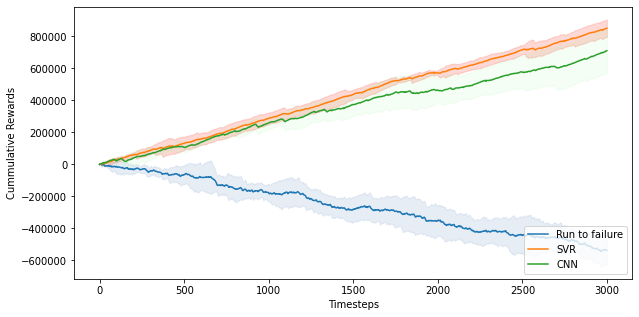

In [30]:
#plot graph 
x = [i for i in range(timeStop)]
plt.figure(figsize=(10, 5))
plt.plot(x, rtf_rewards_mean)
plt.fill_between(x, rtf_rewards_upper, rtf_rewards_lower, color='lightsteelblue', alpha=0.3)
plt.plot(x, SVR_rewards_mean)
plt.fill_between(x, SVR_rewards_upper, SVR_rewards_lower, color='salmon', alpha=0.3)
plt.plot(x, CNN_rewards_mean)
plt.fill_between(x, CNN_rewards_upper, CNN_rewards_lower, color='palegreen', alpha=0.1)
plt.legend(['Run to failure', 'SVR', 'CNN'], loc='lower right')
plt.ylabel('Cummulative Rewards')
plt.xlabel('Timesteps')
plt.show()

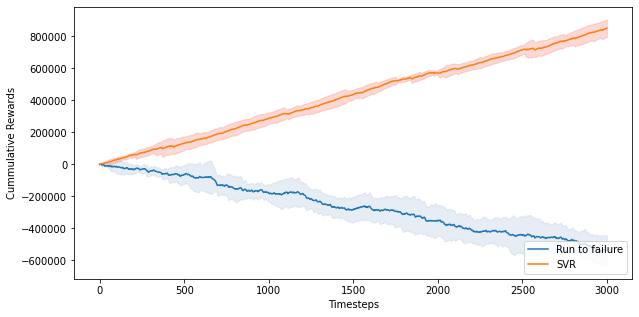

In [31]:
#plot graph 
x = [i for i in range(timeStop)]
plt.figure(figsize=(10, 5))
plt.plot(x, rtf_rewards_mean)
plt.fill_between(x, rtf_rewards_upper, rtf_rewards_lower, color='lightsteelblue', alpha=0.3)
plt.plot(x, SVR_rewards_mean)
plt.fill_between(x, SVR_rewards_upper, SVR_rewards_lower, color='salmon', alpha=0.3)
plt.legend(['Run to failure', 'SVR'], loc='lower right')
plt.ylabel('Cummulative Rewards')
plt.xlabel('Timesteps')
plt.show()